<a href="https://colab.research.google.com/github/ashwinsinha32/Project1Redo/blob/main/Project1_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Ashwin Sinha

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. You can find the data on Blackboard. 

I will be using the Happiness dataset:


In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
happy =pd.read_csv('/content/drive/MyDrive/CS167Spring22/datasets/happiness_data.csv')
happy.head()

Mounted at /content/drive


,Overall rank,Year,Country or region,Score,GDP per capita,Social support and Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# Problem: 
Which dataset are you going to use? What questions are you going to ask about this dataset? Make sure that you can answer the question using ML models. What are your predictor variables and target variable?

I will be using the Happiness dataset to determine which countries have the highest happiness score given the numerous features we have available, from generosity levels to life expectancy predictions. With this information, we can evaluate a country's happiness ranking, along with predicting the general pleasure one might gain from living in a country. Target Variable = Score |
Predictor Variables = GDP per capita, generosity, freedom to make life choices, and social support and family.

# Data Preparation
Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc). 

The original dataset has 2,580 rows, but after dropping rops that contained a value of "Unrated" in the Stars category, we reduced it down to 2,577 rows.  We then needed to convert NaN values in the "Top Ten" category to zero to do our analysis.  Additionally, I created a couple different subsets based on different predictors as well as a subset that contained all the values of the highest rating "Top Ten" values since 2012.  This subset called TopRamen contains 37 rows.  TopRamenHQ shows which countries the best ramen are from, along with the brand and a couple other features.  Lastly, we created dummy variables to give binary nunmbers to the brand and style of ramen so that we can convert them to a quantitative figure.

In [2]:
# data prep code 
happy.shape

(782, 10)

In [3]:
happy['GDP per capita'].isnull().values.any()
happy['Social support and Family'].isnull().values.any()
happy['Generosity'].isnull().values.any()
happy['Freedom to make life choices'].isnull().values.any()


print("after: ", happy.shape)

after:  (782, 10)


In [4]:
happy2 = happy.dropna( subset = ['Country or region']).copy()
print("after: ", happy2.shape)

after:  (782, 10)


In [5]:
happy2 = happy[happy2["Year"].astype(str).str.contains('2018')]
happy2.head()

,Overall rank,Year,Country or region,Score,GDP per capita,Social support and Family,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,2018,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,2018,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,2018,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,2018,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,2018,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# Metrics
Identify which metrics you will be using to test your model and say why they are appropriate.

We will be doing a regression algorithm to determine how the machine can assess happiness levels agains the overall ranking in column 1.  We will use the r^2 value to assess the performance of the models.  This is appropriate as r^2 values can measure regression models instead of using accuracy.

# Baseline Performance
Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?

The baseline for our metrics is around an accuracy score of .0174.  This is a dummy classifier algorithm that removes Country from the dataset, and then evaluates its accuracy on how well the model did to predict which country a new ramen review is from.  This is the "unsmart" model that would happen if you guessed randomly each time.

In [6]:
# build and test a baseline model here
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

predictors = ['GDP per capita', 'Social support and Family', 'Freedom to make life choices', 'Generosity']
target = 'Score'

train_data, test_data, train_sln, test_sln = train_test_split(happy[predictors], happy[target], test_size = 0.2, random_state = 41)
train_data.head()

baseline = DummyRegressor()
baseline.fit(train_data, train_sln)
baseline_pred = baseline.predict(test_data)

print('r^2: ', metrics.r2_score(test_sln, baseline_pred))

r^2:  -0.0005261696220115741


# Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one.


In [7]:
# Execute your plan here (build and test your models to answer your question)

# knn
import numpy as np
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

knn = neighbors.KNeighborsRegressor(n_neighbors=25)
knn.fit(train_data,train_sln)
happy_preds = knn.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, happy_preds))

r^2:  0.7592632189911994


In [8]:
#Weighted knn
wknn = neighbors.KNeighborsRegressor(n_neighbors=25, weights = 'distance')
wknn.fit(train_data,train_sln)
whappy_preds = wknn.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, whappy_preds))

r^2:  0.7718920142168043


In [9]:
#Decision Tree
from sklearn import tree
from sklearn import metrics

dt = tree.DecisionTreeRegressor(random_state = 40)
dt.fit(train_data,train_sln)
dt_happy_preds = dt.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, dt_happy_preds))

r^2:  0.6051901153153285


In [10]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 40)
rf.fit(train_data, train_sln)
rf_preds = rf.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, rf_preds))

r^2:  0.7929901560577577


# Results
After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune. 

For the knn and weighted knn models, I played around with different k values to maximize the r^2 value.  I found that the range of 20-30 for k value were the strongest, with 25 being the peak of that metric.  The r^2 values for these models were .759 for the knn, and .771 for the weighted knn model.

For the decision tree and random forest models, I used a random state @40 to evaluate the model and make it reproducible. The r^2 values for these models were .605 for the decision tree, and .793 for the random forest.

In [11]:
# Include code to show your results (graphs, etc)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

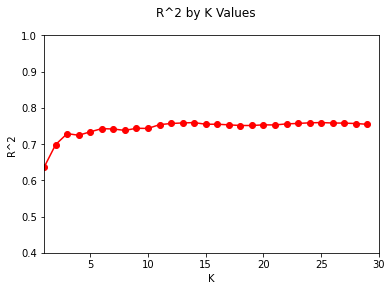

r^2:  0.7592632189911994


In [12]:
  def r2(k):
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_data, train_sln)
    preds = knn.predict(test_data)
    knn_r2 = metrics.r2_score(test_sln, preds)
    return knn_r2

  points = 30
  series = []
  for i in range (1, points):
    val = r2(i)
    series.append(val)

  xvals = range(1, points)
  plt.suptitle('R^2 by K Values')
  plt.plot(xvals, series, 'ro-')
  plt.axis([1, 30, 0.4, 1])
  plt.xlabel('K')
  plt.ylabel('R^2')
  plt.show()

knn = neighbors.KNeighborsRegressor(n_neighbors=25)
knn.fit(train_data,train_sln)
happy_preds = knn.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, happy_preds))

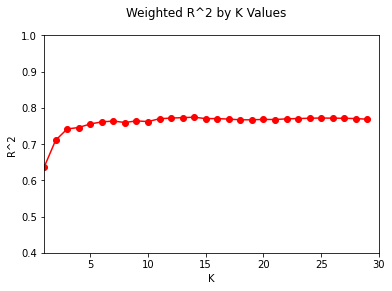

r^2:  0.7718920142168043


In [13]:
  def w_r2(k):
    wknn = neighbors.KNeighborsRegressor(n_neighbors = k, weights = 'distance')
    wknn.fit(train_data, train_sln)
    preds = wknn.predict(test_data)
    wknn_r2 = metrics.r2_score(test_sln, preds)
    return wknn_r2

  points = 30
  series = []
  for i in range (1, points):
    val = w_r2(i)
    series.append(val)

  xvals = range(1, points)
  plt.suptitle('Weighted R^2 by K Values')
  plt.plot(xvals, series, 'ro-')
  plt.axis([1, 30, 0.4, 1])
  plt.xlabel('K')
  plt.ylabel('R^2')
  plt.show()

wknn = neighbors.KNeighborsRegressor(n_neighbors=25, weights = 'distance')
wknn.fit(train_data,train_sln)
whappy_preds = wknn.predict(test_data)
print('r^2: ', metrics.r2_score(test_sln, whappy_preds))

In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

def dt_r2(train, test, train_sln, test_sln, max_dep):
  tree = DecisionTreeRegressor(random_state = 41,max_depth=max_dep)
  tree.fit(train, train_sln)
  prediction = tree.predict(test)
  r2 = metrics.r2_score(test_sln, prediction)
  return r2

In [20]:
number_of_trees = range(10,50,10)
r2 = []

for n in number_of_trees:
  r2.append(r2(train_data,test_data, train_sln, test_sln, max_dep))

  xvals = range(1, points)
  plt.suptitle('R^2 by # of Trees')
  plt.plot(number_of_trees, r2, 'bo-')
  plt.axis([1, 30, 0, 1])
  plt.xlabel('# of Trees')
  plt.ylabel('R^2')
  plt.show()

NameError: ignored

In [21]:
dt_results = DecisionTreeRegressor(random_state = 41, max_depth = 5)
dt_results.fit(train_data, train_sln)
dt_results_predict = dt_results.predict(test_data)

print('r2: ', metrics.r2_score(test_sln, dt_results_predict))

r2:  0.7443015382297515


In [22]:
#Random Forest
def rf_mse(train, test, train_sln, test_sln, n_est, max_dep):
  forest = RandomForestRegressor(random_state = 41, n_estimators=n_est, max_depth=max_dep)
  forest.fit(train, train_sln)
  pred = forest.predict(test)
  mse = metrics.mean_squared_error(test_sln, pred)
  return mse

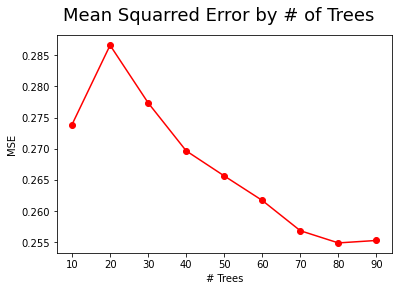

In [23]:
n_trees = range(10,100,10)
mse = []

for n in n_trees:
  mse.append(rf_mse(train_data, test_data, train_sln, test_sln, n, None))

from matplotlib import pyplot as plt
%matplotlib inline
plt.suptitle("Mean Squarred Error by # of Trees", fontsize=18)
plt.xlabel('# Trees')
plt.ylabel('MSE')
plt.plot(n_trees, mse, 'ro-')
plt.show()

In [24]:
forest_results = RandomForestRegressor(random_state = 41, max_depth = 8, n_estimators = 40)
forest_results.fit(train_data, train_sln)
forest_results_predict = forest_results.predict(test_data)

print('r2: ', metrics.r2_score(test_sln, forest_results_predict))

r2:  0.782501296390773


In [27]:
#Feature importance chart

index = range(len(predictors))

plt.figure(figsize=(8,10))
plt.barh(index,forest.feature_importances_,height=0.35)
plt.ylabel('Predictors')
plt.yticks(index, predictors)
plt.xlabel("Random Forests Predictor Importances")
plt.show()

NameError: ignored

<Figure size 576x720 with 0 Axes>

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

In [36]:
#Normalized knn
neigh_normal = neighbors.KNeighborsRegressor(n_neighbors=15, weights = 'distance')
neigh_normal.fit(train_data_normalized, train_sln)
predictions_normal = neigh_normal.predict(test_data_normalized)

print('r2: ', metrics.r2_score(test_sln, predictions_normal))

r2:  0.7792580654911037


In [35]:
#Normalized weighted-kNN
wkNN_normalized = neighbors.KNeighborsRegressor(n_neighbors=10, weights = 'distance')
wkNN_normalized.fit(train_data_normalized, train_sln)
wkNN_predictions_normalized = wkNN_normalized.predict(test_data_normalized)

print('r2: ', metrics.r2_score(test_sln, wkNN_predictions_normalized))

r2:  0.7847720642392453


In [34]:
#Normalized decision tree
dt_normalized = DecisionTreeRegressor(random_state = 41, max_depth = 5)
dt_normalized.fit(train_data, train_sln)
dt_normalized_predict = dt_normalized.predict(test_data)

print('r2: ', metrics.r2_score(test_sln, dt_normalized_predict))

r2:  0.7443015382297515


In [33]:
#Normalized Random forest
normal_forest = RandomForestRegressor(random_state = 41, max_depth = 8, n_estimators = 40)
normal_forest.fit(train_data, train_sln)
normal_forest_predict = forest_results.predict(test_data)

print('r2: ', metrics.r2_score(test_sln, normal_forest_predict))

r2:  0.782501296390773


# Bumps in the Road:
What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?


I had many different challenges when working with this dataset, and I still have a lot to comb through with the model execution due to my interest in finding specific Countries that produce better ramen than others.  Some specific problems I had included separating and identifying the "Top Ten" ramen reviews from the NaN values and the "2016 #2" type examples. Another challenge I had was deciding what objective I wanted to find from this dataset.  Deciding if I wanted to do a classifier for the Country of origin, or regression for predicted rating (Stars) based on other predictors was something I went back and forth on. Lastly, converting the string values for brands into floats is a challenge I don't believe I have overcame.  I still have work to do on this ML Project, and I will be working in the next couple days to solve these issues.

# Conclusions
What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

When I originally did this ML program with a Regression to find the predicted Rating of a type of ramen based on the other predictors, I ran into many issues as one might tell as the accuracy of predicting the rating was not a telling predictor for the quality of ramen.  After switching to a Classifier, I had a better chance to find if there is quality differences based on Country of Origin.  From the model, the knn Classifier was the best model compared to Decision Trees and Random Forests.  I would appreciate some insight and feedback on how to solve these problems I'm running into.